<a href="https://colab.research.google.com/github/Shriyasehgal/MachineLearning/blob/master/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
stock_csv = files.upload()

Saving training_2.csv to training_2 (1).csv


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import csv
import numpy as np
from dateutil import parser
from matplotlib.pyplot import figure
import datetime
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import *

In [ ]:
stock_data= open('/content/training_2.csv')
stock_data=csv.reader(stock_data)
stock_lines=list(stock_data)
stock_lines[0][0]='2018-01-01 00:00:00.000'

In [ ]:
for i in range(0,len(stock_lines)):
  stock_lines[i][0]=parser.parse(stock_lines[i][0]).strftime("%Y-%m-%d %H:%M:%S")
  stock_lines[i][1]=float(stock_lines[i][1])
stock_lines_sorted=sorted(stock_lines, key=lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S'))

str

In [ ]:
stock_df = pd.DataFrame(stock_lines_sorted, columns =['date','Opening_Rate'])
type(stock_df.date)
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df=stock_df.set_index('date')
stock_df

,Opening_Rate
date,
2018-01-01,111.75
2018-01-02,109.00
2018-01-03,109.25
2018-01-04,120.15
2018-01-05,122.85
...,...
2021-05-21,351.80
2021-05-24,329.85
2021-05-25,352.95


# Visualisating Data

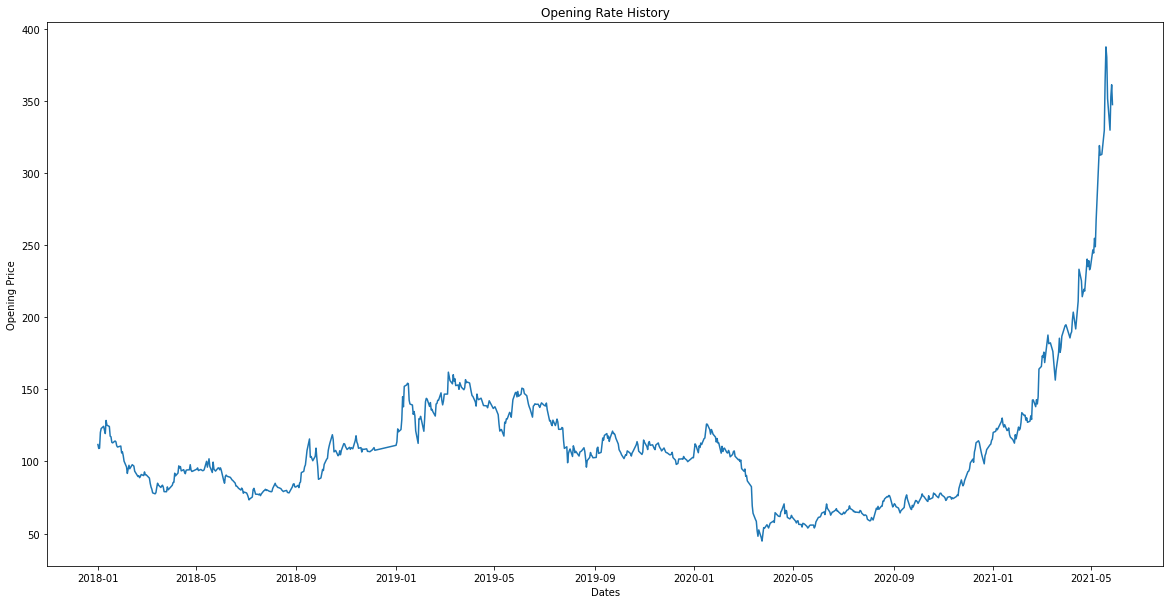

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Opening Rate History")
plt.plot(stock_df.index,stock_df.Opening_Rate)
plt.xlabel('Dates')
plt.ylabel('Opening Price')

plt.show()

# Splitting Data

In [ ]:
#scaler=MinMaxScaler(feature_range(0,1))


def Split_Dataset(data):
  x_data=[]
  y_data=[]
  for i in range(50,len(data)):
    x_data.append(data[i-50:i])
    y_data.append(data[i])
  return (x_data,y_data)



In [ ]:
train, test = train_test_split(np.array(stock_df.Opening_Rate), test_size=0.2,shuffle=False)
(x_train,y_train)=Split_Dataset(train)

(x_test,y_test)=Split_Dataset(test)

# Linear Regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_linear= regr.predict(x_test)


In [ ]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_linear))

print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, y_pred_linear)))

Coefficient of determination: 0.98
Mean squared error: 9.46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


Text(0, 0.5, 'Opening Price')

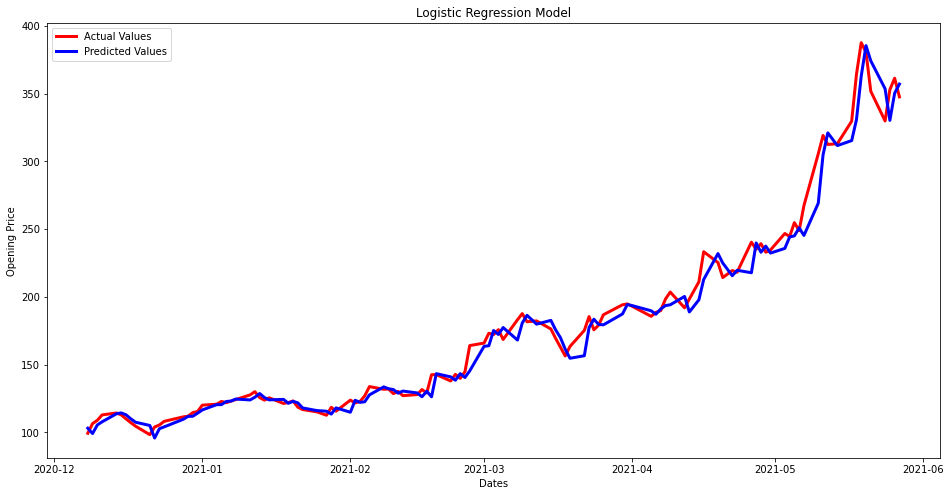

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Logistic Regression Model")
plt.plot(stock_df.index[-len(y_test):],y_test,  color='red',linewidth=3)
#plt.plot(stock_df.index,rate,  color='red',linewidth=3)
plt.plot(stock_df.index[-len(y_test):],y_pred_linear, color='blue', linewidth=3)
plt.legend([y_test,y_pred_linear],labels=['Actual Values','Predicted Values'])
plt.xlabel('Dates')
plt.ylabel('Opening Price')

# Predicting Next Day's Stock Value

In [ ]:
def predict_next(n,model,preds):
  j=1
  values=[preds[-1]]
  last_day=x_test[-1]
  for i in range(1,n+1):
    next_value= model.predict([np.append(last_day[j:],values)])
    values= np.append(values,next_value)
    j+=1
  print(f'Model:{model}\n')
  for i in range(1,len(values)):
    print(f'Day {i} Prediction: {values[i]} USD' )




In [ ]:
predict_next(10,regr,y_pred_linear)

Model:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Day 1 Prediction: 357.4667803800925 USD
Day 2 Prediction: 356.1126831885179 USD
Day 3 Prediction: 371.75312964812633 USD
Day 4 Prediction: 377.57032121158437 USD
Day 5 Prediction: 391.3966756078971 USD
Day 6 Prediction: 416.1698705798908 USD
Day 7 Prediction: 404.40170233844793 USD
Day 8 Prediction: 376.9007857318215 USD
Day 9 Prediction: 351.88075545843174 USD
Day 10 Prediction: 371.55825938292486 USD


Text(0, 0.5, 'Opening Price')

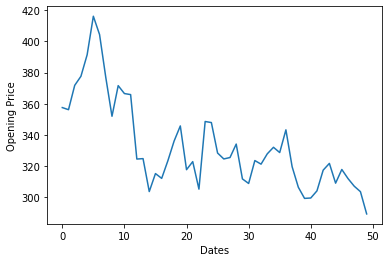

In [ ]:

plt.plot(range(0,len(new_values)),new_values)
plt.xlabel('Dates')
plt.ylabel('Opening Price')

# LSTM

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM
tf.config.run_functions_eagerly(True)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(stock_df.filter(['Opening_Rate']).values)

In [ ]:
train, test = train_test_split(scaled_data, test_size=0.2,shuffle=False)
(x_train,y_train)=Split_Dataset(train)

(x_test,y_test)=Split_Dataset(test)

In [ ]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model_LSTM= Sequential()
model_LSTM.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model_LSTM.add(LSTM(50,return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))

In [ ]:
#Comple the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model_LSTM.fit(x_train,y_train,batch_size=1,epochs=8)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/8
606/606 [==============================] - 101s 166ms/step - loss: 0.0025
Epoch 2/8
606/606 [==============================] - 101s 166ms/step - loss: 5.4729e-04
Epoch 3/8
606/606 [==============================] - 100s 166ms/step - loss: 3.6403e-04
Epoch 4/8
606/606 [==============================] - 101s 166ms/step - loss: 2.9138e-04
Epoch 5/8
606/606 [==============================] - 101s 166ms/step - loss: 2.3036e-04
Epoch 6/8
606/606 [==============================] - 101s 166ms/step - loss: 2.7220e-04
Epoch 7/8
606/606 [==============================] - 101s 166ms/step - loss: 2.4515e-04
Epoch 8/8
606/606 [==============================] - 101s 167ms/step - loss: 2.3890e-04


In [ ]:
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
pred_LSTM=model_LSTM.predict(x_test)
pred_LSTM=scaler.inverse_transform(pred_LSTM)
y_test=scaler.inverse_transform(y_test)
y_train=scaler.inverse_transform(y_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
#Root mean Square Error(RSME) [Standard Variation]
rmse=np.sqrt(np.mean(pred_LSTM-y_test)**2)
rmse

0.9462794826341735

In [ ]:
pred_LSTM.shape

(115, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


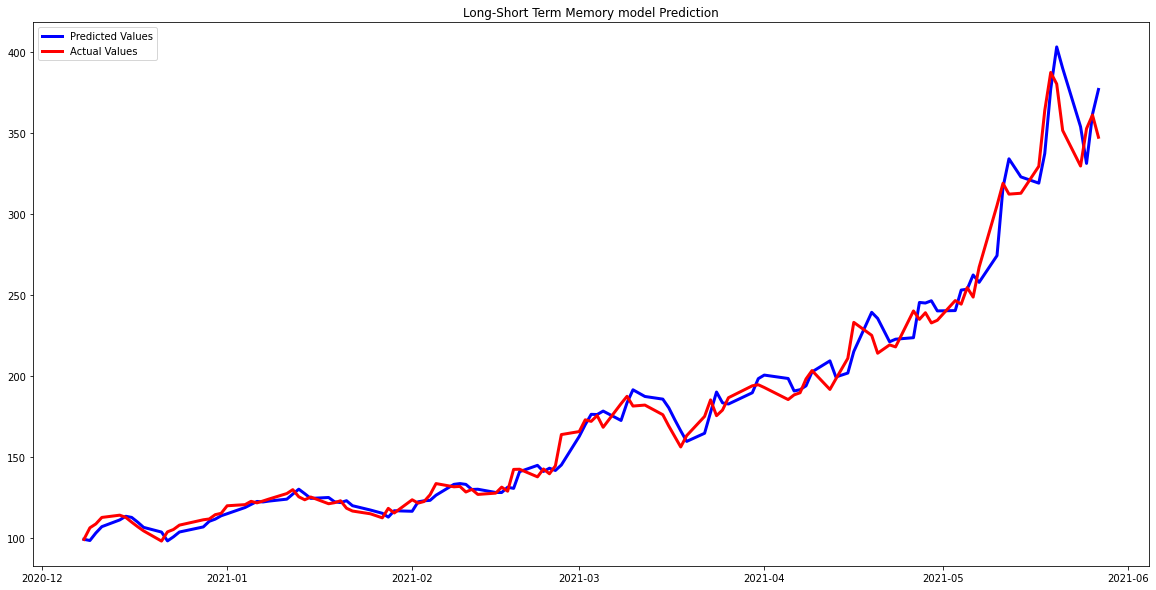

In [ ]:

plt.figure(figsize=(20, 10))
plt.plot(stock_df.index[-len(y_test):],pred_LSTM, color='blue', linewidth=3)
plt.plot(stock_df.index[-len(y_test):],y_test, color='red', linewidth=3)
plt.title("Long-Short Term Memory model Prediction")
plt.legend([y_test,pred_LSTM],labels=['Predicted Values','Actual Values'])

In [ ]:
valid[0]=y_test[:][0]
valid[1]=pred_LSTM[0]


In [ ]:
valid[0]

array([103.16716766])

In [ ]:
predict_next(10,model_LSTM,pred_LSTM)